__File: srg_potentials_fig.ipynb__

__Author:   A. J. Tropiano (tropiano.4@osu.edu)__<br/>
__Date:     August 28, 2019__

This notebook creates several figures showing SRG-evolved NN potentials. Each function creates and saves a figure to the __Figures/SRG_potentials_evolution__ folder. Below is an outline of each function:
* potential_contours - Plots contours of an SRG-evolving potential in $\lambda$.
* potential_diagonals - Plots the diagonal matrix elements of an SRG-evolving potential in $\lambda$. <font color=red>Work in progress.</font>
* potential_off_diagonals - Plots the far off-diagonal matrix elements of an SRG-evolving potential in $\lambda$. <font color=red>Work in progress.</font>

__Revision history:<br/>__
* ...

In [1]:
from os import chdir, getcwd
import matplotlib.colors as colors
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.linalg import expm
# Scripts made by A.T.
from Figures import figures_functions as ff
from Potentials.vsrg_macos import load_save_potentials as lp
import observables as ob
import operators as op
from SRG_codes.srg_unitary_transformation import SRG_unitary_transformation

__Plotting functions__

In [2]:
def potential_contours(kvnn, channel, kmax, kmid, ntot, generator, lambda_bd=0.00):
    """
    Plots 1 x 4 sub-plots figure of an NN potential [fm] with respect to momentum [fm^-1] SRG-evolving from
    lambda = 6.0 to 1.5 fm^-1 as contour plots. Must specify details of the SRG-evolved potential, hence the 
    arguments kvnn, channel, etc.
    
    Parameters
    ----------
    kvnn : int
        This number specifies the potential.
    channel : str
        The partial wave channel ('1S0', '3S1', etc.)
    kmax : float
        Maximum value in the momentum mesh.
    kmid : float
        Mid-point value in the momentum mesh.
    ntot : int
        Number of momentum points in mesh.
    generator : str
        SRG generator 'Wegner', 'T', or 'Block-diag'.
    lambda_bd : float, optional
        Lambda value for block-diagonal decoupling (e.g. 2.00 fm^-1).

    Saves
    -----
    file_name = potential_contours_ with an extension based off the given arguments.
    file_type = .pdf
    
    """
    
    # Current working directory
    cwd = getcwd()
    
    
    # Set-up #
    
    # Limits of axes on contours (units are fm^-1)
    axes_max = 4.0

    # Load momentum for interpolation
    k_array, _ = lp.load_momentum(kvnn, channel, kmax, kmid, ntot)
    
    # Lambda evolution values in fm^-1
    lambdas = [6.0, 3.0, 2.0, 1.5]
    
    # Store evolved potentials in dictionary with lambda as key
    d = {}
    
    # Loop over lambda values and add to dictionary
    for lamb in lambdas:
        
        # Load evolved potential
        V_evolved = lp.load_potential(kvnn, channel, kmax, kmid, ntot, 'srg', generator, lamb, lambda_bd)
        
        # Interpolate the potential through 0 to axes_max for smoother looking figure (the extension _int means 
        # interpolated)
        k_array_int, V_evolved_int = ff.interpolate_matrix(k_array, V_evolved, axes_max)
        
        # Save potential to dictionary
        d[lamb] = V_evolved_int
    
    
    # Plot specifications #
    
    # Specifications of x and y axes
    # Step-size in labeling tick marks
    axes_stepsize = 1.0
    # x and y axes ticks
    axes_ticks = np.arange(0.0, axes_max + axes_stepsize, axes_stepsize)
    
    # Limits of colorbar
    mx = 1.0
    mn = -1.0
    
    # Labels
    axes_label = 'k [fm' + r'$^{-1}$' + ']'
    lambda_label = r'$\lambda=%.1f$' + ' fm' + r'$^{-1}$'
    if generator == 'Block-diag':
        generator_label = r'$G=H_{BD}$'+'\n'+r'$\Lambda=%d$' % lambda_bd + ' fm' + r'$^{-1}$'
    elif generator == 'Wegner':
        generator_label = r'$G=H_{D}$'
    elif generator == 'T':
        generator_label = r'$G=T_{rel}$'
    colorbar_label = '[fm]'
    
    # Fontsize for labels and tick marks
    axes_label_size = 18
    lambda_label_size = 17
    generator_label_size = 17
    colorbar_label_size = 20
    axes_tick_size = 18
    colorbar_tick_size = 18
    
    # Location of labels
    generator_label_location = 'upper right'
    lambda_label_location = 'lower left'
        
    # Color scheme for contour plots
    color_style = 'jet'
    
    # Size of figure
    row_number = 1
    column_number = 4
    figure_size = (4*column_number, 3.5*row_number) # (width, height) - extra width for colorbar
    
    
    # Plot the 1 x 4 figure of contours #
    
    plt.close('all')
    
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True, figsize=figure_size)
    
    # Sub-plot 1: lambda = 6.0 fm^-1
    ax1.pcolormesh(k_array_int, k_array_int, d[ lambdas[0] ], cmap=color_style, vmin=mn, vmax=mx, rasterized=True)
    # Specify axes tick marks
    ax1.xaxis.set_ticks(axes_ticks)
    ax1.xaxis.set_ticklabels(axes_ticks)
    ax1.yaxis.set_ticks(axes_ticks)
    ax1.yaxis.set_ticklabels(axes_ticks)
    # Specify axes limits
    ax1.set_xlim( (0, axes_max) )
    ax1.set_ylim( (0, axes_max) )
    # Position of x-axis label and tick marks
    ax1.xaxis.set_label_position('top')
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=True, labelsize=axes_tick_size)
    # Prevent overlapping x-axis tick marks
    xticks_1 = ax1.xaxis.get_major_ticks()
    xticks_1[-1].set_visible(False)
    # Set axes labels
    ax1.set_xlabel(axes_label, fontsize=axes_label_size)
    ax1.set_ylabel(axes_label, fontsize=axes_label_size)
    # Add lambda label as anchored text
    anchored_text_1 = AnchoredText(lambda_label%lambdas[0], prop=dict(size=lambda_label_size),
                                   loc=lambda_label_location)
    ax1.add_artist(anchored_text_1)
    
    # Sub-plot 2: lambda = 3.0 fm^-1
    ax2.pcolormesh(k_array_int, k_array_int, d[ lambdas[1] ], cmap=color_style, vmin=mn, vmax=mx, rasterized=True)
    # Specify axes tick marks
    ax2.xaxis.set_ticks(axes_ticks)
    ax2.xaxis.set_ticklabels(axes_ticks)
    # Specify axes limits
    ax2.set_xlim( (0, axes_max) )
    ax2.set_ylim( (0, axes_max) )
    # Position of x-axis label and tick marks
    ax2.xaxis.set_label_position('top')
    ax2.xaxis.tick_top()
    ax2.tick_params(labeltop=True, labelsize=axes_tick_size)
    # Prevent overlapping x-axis tick marks
    xticks_2 = ax2.xaxis.get_major_ticks()
    xticks_2[-1].set_visible(False)
    # Set axes labels
    ax2.set_xlabel(axes_label, fontsize=axes_label_size)
    # Add lambda label as anchored text
    anchored_text_2 = AnchoredText(lambda_label%lambdas[1], prop=dict(size=lambda_label_size),
                                   loc=lambda_label_location)
    ax2.add_artist(anchored_text_2)
    
    # Sub-plot 3: lambda = 2.0 fm^-1
    ax3.pcolormesh(k_array_int, k_array_int, d[ lambdas[2] ], cmap=color_style, vmin=mn, vmax=mx, rasterized=True)
    # Specify axes tick marks
    ax3.xaxis.set_ticks(axes_ticks)
    ax3.xaxis.set_ticklabels(axes_ticks)
    # Position of x-axis label and tick marks
    ax3.xaxis.set_label_position('top')
    ax3.xaxis.tick_top()
    ax3.tick_params(labeltop=True, labelsize=axes_tick_size)
    # Prevent overlapping x-axis tick marks
    xticks_3 = ax3.xaxis.get_major_ticks()
    xticks_3[-1].set_visible(False)
    # Specify axes limits
    ax3.set_xlim( (0, axes_max) )
    ax3.set_ylim( (0, axes_max) )
    # Set axes labels
    ax3.set_xlabel(axes_label, fontsize=axes_label_size)
    # Add lambda and generator labels as anchored texts
    anchored_text_3 = AnchoredText(lambda_label%lambdas[2], prop=dict(size=lambda_label_size),
                                   loc=lambda_label_location)
    ax3.add_artist(anchored_text_3)
    anchored_text_4 = AnchoredText(generator_label, prop=dict(size=generator_label_size),
                                   loc=generator_label_location)
    ax3.add_artist(anchored_text_4)

    # Sub-plot 4: lambda = 1.5 fm^-1
    c = ax4.pcolormesh(k_array_int, k_array_int, d[ lambdas[3] ], cmap=color_style, vmin=mn, vmax=mx, 
                       rasterized=True)
    # Specify axes tick marks
    ax4.xaxis.set_ticks(axes_ticks)
    ax4.xaxis.set_ticklabels(axes_ticks)
    # Position of x-axis label and tick marks
    ax4.xaxis.set_label_position('top')
    ax4.xaxis.tick_top()
    ax4.tick_params(labeltop=True, labelsize=axes_tick_size)
    # Specify axes limits
    ax4.set_xlim( (0, axes_max) )
    ax4.set_ylim( (0, axes_max) )
    # Set axes labels
    ax4.set_xlabel(axes_label, fontsize=axes_label_size)
    # Add lambda label as anchored texts
    anchored_text_5 = AnchoredText(lambda_label%lambdas[3], prop=dict(size=lambda_label_size),
                                   loc=lambda_label_location)
    ax4.add_artist(anchored_text_5)

    # Invert y-axis
    plt.gca().invert_yaxis()
    # Amount of white space in-between sub-plots
    f.subplots_adjust(hspace=0.0, wspace=0.0)
    # Adjust for colorbar space
    f.subplots_adjust(right=0.8)
    cbar_ax = f.add_axes( (0.85, 0.15, 0.05, 0.7) )
    # Add colorbar and set tick size
    cbar = f.colorbar(c, cax=cbar_ax)
    cbar.ax.tick_params(labelsize=colorbar_tick_size)
    # Set colorbar label
    cbar.ax.set_title(colorbar_label, fontsize=colorbar_label_size)

    
    # Save figure as a .pdf
    
    # Name of the file
    if generator == 'Block-diag':
        name = 'potential_contours_kvnn%d_%s_%s%.2f'%(kvnn, channel, generator, lambda_bd)
        # Replace '.' with ',' in file name since LaTeX doesn't like periods
        file_name = ff.replace_periods_with_commas(name)
    else:
        file_name = 'potential_contours_kvnn%d_%s_%s'%(kvnn, channel, generator)
        
    chdir('Figures/SRG_potentials')
    f.savefig(file_name+'.pdf', bbox_inches='tight')
    chdir(cwd)

In [3]:
# Work in progress
def potential_diagonals(channel):
    """
    Plots 1 x 4 sub-plots figure of an NN potential [fm] with respect to momentum [fm^-1] SRG-evolving from
    lambda = 6.0 to 1.5 fm^-1 isolating the diagonal matrix elements. Here, we fix the potentials to be EM N3LO (500
    MeV), RKE N3LO (450 MeV), and Gez. N2LO (1 fm) where the generators are varied.
    
    Parameters
    ----------
    channel : str
        The partial wave channel ('1S0', '3S1', etc.)

    Saves
    -----
    file_name = potential_diagonals_ with an extension based off the given arguments.
    file_type = .pdf
    
    """
    
    # Current working directory
    cwd = getcwd()
    
    
    # Set-up #
    
    # Lambda evolution values in fm^-1
    lambdas = [6.0, 3.0, 2.0, 1.5]
    
    # Specifications for EM N3LO (500 MeV), RKE N3LO (450 MeV), and Gez. N2LO (1.0 fm) in the format 
    # (kvnn, kmax, kmid)
    potential_specifications = [(10, 30.0, 4.0, 'Wegner'), (106, 8.0, 2.0, 'Wegner'), (222, 10.0, 2.0, 'Wegner'),
                                (10, 30.0, 4.0, 'Block-diag'), (106, 8.0, 2.0, 'Block-diag'),
                                (222, 10.0, 2.0, 'Block-diag')]
    
    # Block-diagonal lambda value in fm^-1
    lambda_bd = 2.00
    
    # Store different phase shifts and momentum arrays in dictionary with kvnn keys
    d = {}
    d[ potential_specifications[0][0] ] = {} # EM N3LO
    d[ potential_specifications[1][0] ] = {} # RKE N3LO
    d[ potential_specifications[2][0] ] = {} # Gez. N3LO
    
    # Loop over kvnn, generators, and lambda values, then add to dictionary
    for spec in potential_specifications:
        
        # Set kvnn, kmax, and kmid
        kvnn = spec[0]
        kmax = spec[1]
        kmid = spec[2]
        generator = spec[3]
        
        # Load momentum and add to dictionary
        k_array, _ = lp.load_momentum(kvnn, channel, kmax, kmid, ntot)
        d[kvnn]['k_array'] = k_array
        
        d[kvnn][generator] = {}
        
        for lamb in lambdas:
        
            # Load evolved potential
            V_evolved = lp.load_potential(kvnn, channel, kmax, kmid, ntot, 'srg', generator, lamb, lambda_bd)               
            
            # Save diagonal elements of potential to dictionary (just the S-S block)
            d[kvnn][generator][lamb] = np.diag( V_evolved[:ntot, :ntot] )

            
    # Plot specifications #
    
    # Limits of x and y axes
    xlim = [0.0, 4.0]
    ylim = [-3.5, 1.5]
    
    # Labels
    x_label = 'k [fm' + r'$^{-1}$' + ']'
    y_label = r"$V_{\lambda}(k, k)$" + " [fm]"
    EM_label = 'EM N' + r'$^3$' + 'LO' # EM N3LO
    RKE_label = 'RKE N' + r'$^3$' + 'LO' # RKE N3LO
    Gez_label = 'Gez. N' + r'$^2$' + 'LO' # Gez. N2LO
    Wegner_label = r'$G=H_{D}$'
    Block_diag_label = r'$G=H_{BD}$'+'\n'+r'$\Lambda=%d$' % lambda_bd + ' fm' + r'$^{-1}$'
    lambda_label = r'$\lambda=%.1f$' + ' fm' + r'$^{-1}$'
    
    # Fontsize for labels and tick marks
    x_label_size = 18
    y_label_size = 20
    legend_label_size = 18
    lambda_label_size = 17
    
    # Location of labels
    legend_label_location = 'lower right'
    lambda_label_location = 'upper center'
    
    # Size of figure
    row_number = 1
    column_number = 4
    figure_size = (4*column_number, 4*row_number) # (width, height)
    
    
    # Plot the 1 x 4 figure of line plots #
    
    plt.close('all')
    
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True, figsize=figure_size)
    
    # Sub-plot 1: lambda = 6.0 fm^-1
    ax1.plot(d[10]['k_array'], d[10]['Wegner'][ lambdas[0] ], color='xkcd:black', label=EM_label)
    ax1.plot(d[10]['k_array'], d[10]['Block-diag'][ lambdas[0] ], color='xkcd:black', linestyle='dashdot')
    ax1.plot(d[106]['k_array'], d[106]['Wegner'][ lambdas[0] ], color='xkcd:red', label=RKE_label)
    ax1.plot(d[106]['k_array'], d[106]['Block-diag'][ lambdas[0] ], color='xkcd:red', linestyle='dashdot')
    ax1.plot(d[222]['k_array'], d[222]['Wegner'][ lambdas[0] ], color='xkcd:blue', label=Gez_label)
    ax1.plot(d[222]['k_array'], d[222]['Block-diag'][ lambdas[0] ], color='xkcd:blue', linestyle='dashdot')
    # Specify axes limits
    ax1.set_xlim(xlim)
    ax1.set_ylim(ylim)
    # Prevent overlapping x-axis tick marks
    xticks_1 = ax1.xaxis.get_major_ticks()
    xticks_1[-1].set_visible(False)
    # Set axes labels
    ax1.set_xlabel(x_label, fontsize=x_label_size)
    ax1.set_ylabel(y_label, fontsize=y_label_size)
    # Add legend
    ax1.legend(loc=legend_label_location, frameon=False, fontsize=legend_label_size)
    # Add lambda label as anchored text
    anchored_text_1 = AnchoredText(lambda_label%lambdas[0], frameon=False, prop=dict(size=lambda_label_size),
                                   loc=lambda_label_location)
    ax1.add_artist(anchored_text_1)
    
    # Sub-plot 2: lambda = 3.0 fm^-1
    ax2.plot(d[10]['k_array'], d[10]['Wegner'][ lambdas[1] ], color='xkcd:black')
    ax2.plot(d[10]['k_array'], d[10]['Block-diag'][ lambdas[1] ], color='xkcd:black', linestyle='dashdot')
    ax2.plot(d[106]['k_array'], d[106]['Wegner'][ lambdas[1] ], color='xkcd:red')
    ax2.plot(d[106]['k_array'], d[106]['Block-diag'][ lambdas[1] ], color='xkcd:red', linestyle='dashdot')
    ax2.plot(d[222]['k_array'], d[222]['Wegner'][ lambdas[1] ], color='xkcd:blue')
    ax2.plot(d[222]['k_array'], d[222]['Block-diag'][ lambdas[1] ], color='xkcd:blue', linestyle='dashdot')
    # Specify axes limits
    ax2.set_xlim(xlim)
    ax2.set_ylim(ylim)
    # Prevent overlapping x-axis tick marks
    xticks_2 = ax2.xaxis.get_major_ticks()
    xticks_2[-1].set_visible(False)
    # Set axes labels
    ax2.set_xlabel(x_label, fontsize=x_label_size)
    # Add lambda label as anchored text
    anchored_text_2 = AnchoredText(lambda_label%lambdas[1], frameon=False, prop=dict(size=lambda_label_size),
                                   loc=lambda_label_location)
    ax2.add_artist(anchored_text_2)
    
    # Sub-plot 3: lambda = 2.0 fm^-1
    ax3.plot(d[10]['k_array'], d[10]['Wegner'][ lambdas[2] ], color='xkcd:black')
    ax3.plot(d[10]['k_array'], d[10]['Block-diag'][ lambdas[2] ], color='xkcd:black', linestyle='dashdot')
    ax3.plot(d[106]['k_array'], d[106]['Wegner'][ lambdas[2] ], color='xkcd:red')
    ax3.plot(d[106]['k_array'], d[106]['Block-diag'][ lambdas[2] ], color='xkcd:red', linestyle='dashdot')
    ax3.plot(d[222]['k_array'], d[222]['Wegner'][ lambdas[2] ], color='xkcd:blue')
    ax3.plot(d[222]['k_array'], d[222]['Block-diag'][ lambdas[2] ], color='xkcd:blue', linestyle='dashdot')
    # Specify axes limits
    ax3.set_xlim(xlim)
    ax3.set_ylim(ylim)
    # Prevent overlapping x-axis tick marks
    xticks_3 = ax3.xaxis.get_major_ticks()
    xticks_3[-1].set_visible(False)
    # Set axes labels
    ax3.set_xlabel(x_label, fontsize=x_label_size)
    # Add lambda label as anchored text
    anchored_text_3 = AnchoredText(lambda_label%lambdas[2], frameon=False, prop=dict(size=lambda_label_size),
                                   loc=lambda_label_location)
    ax3.add_artist(anchored_text_3)

    # Sub-plot 4: lambda = 1.5 fm^-1
    ax4.plot(d[10]['k_array'], d[10]['Wegner'][ lambdas[3] ], color='xkcd:black', label=Wegner_label)
    ax4.plot(d[10]['k_array'], d[10]['Block-diag'][ lambdas[3] ], color='xkcd:black', linestyle='dashdot',
             label=Block_diag_label)
    ax4.plot(d[106]['k_array'], d[106]['Wegner'][ lambdas[3] ], color='xkcd:red')
    ax4.plot(d[106]['k_array'], d[106]['Block-diag'][ lambdas[3] ], color='xkcd:red', linestyle='dashdot')
    ax4.plot(d[222]['k_array'], d[222]['Wegner'][ lambdas[3] ], color='xkcd:blue')
    ax4.plot(d[222]['k_array'], d[222]['Block-diag'][ lambdas[3] ], color='xkcd:blue', linestyle='dashdot')
    # Specify axes limits
    ax4.set_xlim(xlim)
    ax4.set_ylim(ylim)
    # Set axes labels
    ax4.set_xlabel(x_label, fontsize=x_label_size)
    # Add legend
    ax4.legend(loc=legend_label_location, frameon=False, fontsize=legend_label_size)
    # Add lambda label as anchored text
    anchored_text_4 = AnchoredText(lambda_label%lambdas[3], frameon=False, prop=dict(size=lambda_label_size),
                                   loc=lambda_label_location)
    ax4.add_artist(anchored_text_4)
    
    # Amount of white space in-between sub-plots
    f.subplots_adjust(hspace=0.0, wspace=0.0)

    
    # Save figure as a .pdf
    
    # Name of the file
    #file_name = 'potential_diagonals_%s' % channel
        
    #chdir('Figures/SRG_potentials')
    #f.savefig(file_name+'.pdf', bbox_inches='tight')
    #chdir(cwd)
    
    # Testing
    plt.show()

In [4]:
# Work in progress
def potential_off_diagonals(channel):
    """
    Plots 1 x 4 sub-plots figure of an NN potential [fm] with respect to momentum [fm^-1] SRG-evolving from
    lambda = 6.0 to 1.5 fm^-1 isolating the far off-diagonal matrix elements. Here, we fix the potentials to be 
    EM N3LO (500 MeV), RKE N3LO (450 MeV), and Gez. N2LO (1 fm) where the generators are varied.
    
    Parameters
    ----------
    channel : str
        The partial wave channel ('1S0', '3S1', etc.)

    Saves
    -----
    file_name = potential_off_diagonals_ with an extension based off the given arguments.
    file_type = .pdf
    
    """
    
    # Current working directory
    cwd = getcwd()
    
    
    # Set-up #
    
    # Lambda evolution values in fm^-1
    lambdas = [6.0, 3.0, 2.0, 1.5]
    
    # Specifications for EM N3LO (500 MeV), RKE N3LO (450 MeV), and Gez. N2LO (1.0 fm) in the format 
    # (kvnn, kmax, kmid)
    potential_specifications = [(10, 30.0, 4.0, 'Wegner'), (106, 8.0, 2.0, 'Wegner'), (222, 10.0, 2.0, 'Wegner'),
                                (10, 30.0, 4.0, 'Block-diag'), (106, 8.0, 2.0, 'Block-diag'),
                                (222, 10.0, 2.0, 'Block-diag')]
    
    # Block-diagonal lambda value in fm^-1
    lambda_bd = 2.00
    
    # Store different phase shifts and momentum arrays in dictionary with kvnn keys
    d = {}
    d[ potential_specifications[0][0] ] = {} # EM N3LO
    d[ potential_specifications[1][0] ] = {} # RKE N3LO
    d[ potential_specifications[2][0] ] = {} # Gez. N3LO
    
    # Loop over kvnn, generators, and lambda values, then add to dictionary
    for spec in potential_specifications:
        
        # Set kvnn, kmax, and kmid
        kvnn = spec[0]
        kmax = spec[1]
        kmid = spec[2]
        generator = spec[3]
        
        # Load momentum and add to dictionary
        k_array, _ = lp.load_momentum(kvnn, channel, kmax, kmid, ntot)
        d[kvnn]['k_array'] = k_array
        
        d[kvnn][generator] = {}
        
        for lamb in lambdas:
        
            # Load evolved potential
            V_evolved = lp.load_potential(kvnn, channel, kmax, kmid, ntot, 'srg', generator, lamb, lambda_bd)               
            
            # Save far off-diagonal elements of potential to dictionary (just the S-S block)
            d[kvnn][generator][lamb] = V_evolved[:ntot, 0]

            
    # Plot specifications #
    
    # Limits of x and y axes
    xlim = [0.0, 4.0]
    ylim = [-3.5, 1.5]
    
    # Labels
    x_label = 'k [fm' + r'$^{-1}$' + ']'
    y_label = r"$V_{\lambda}(k, 0)$" + " [fm]"
    EM_label = 'EM N' + r'$^3$' + 'LO' # EM N3LO
    RKE_label = 'RKE N' + r'$^3$' + 'LO' # RKE N3LO
    Gez_label = 'Gez. N' + r'$^2$' + 'LO' # Gez. N2LO
    Wegner_label = r'$G=H_{D}$'
    Block_diag_label = r'$G=H_{BD}$'+'\n'+r'$\Lambda=%d$' % lambda_bd + ' fm' + r'$^{-1}$'
    lambda_label = r'$\lambda=%.1f$' + ' fm' + r'$^{-1}$'
    
    # Fontsize for labels and tick marks
    x_label_size = 18
    y_label_size = 20
    legend_label_size = 18
    lambda_label_size = 17
    
    # Location of labels
    legend_label_location = 'lower right'
    lambda_label_location = 'upper left'
    
    # Size of figure
    row_number = 1
    column_number = 4
    figure_size = (4*column_number, 4*row_number) # (width, height)
    
    
    # Plot the 1 x 4 figure of line plots #
    
    plt.close('all')
    
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True, figsize=figure_size)
    
    # Sub-plot 1: lambda = 6.0 fm^-1
    ax1.plot(d[10]['k_array'], d[10]['Wegner'][ lambdas[0] ], color='xkcd:black', label=EM_label)
    ax1.plot(d[10]['k_array'], d[10]['Block-diag'][ lambdas[0] ], color='xkcd:black', linestyle='dashdot')
    ax1.plot(d[106]['k_array'], d[106]['Wegner'][ lambdas[0] ], color='xkcd:red', label=RKE_label)
    ax1.plot(d[106]['k_array'], d[106]['Block-diag'][ lambdas[0] ], color='xkcd:red', linestyle='dashdot')
    ax1.plot(d[222]['k_array'], d[222]['Wegner'][ lambdas[0] ], color='xkcd:blue', label=Gez_label)
    ax1.plot(d[222]['k_array'], d[222]['Block-diag'][ lambdas[0] ], color='xkcd:blue', linestyle='dashdot')
    # Specify axes limits
    ax1.set_xlim(xlim)
    ax1.set_ylim(ylim)
    # Prevent overlapping x-axis tick marks
    xticks_1 = ax1.xaxis.get_major_ticks()
    xticks_1[-1].set_visible(False)
    # Set axes labels
    ax1.set_xlabel(x_label, fontsize=x_label_size)
    ax1.set_ylabel(y_label, fontsize=y_label_size)
    # Add legend
    ax1.legend(loc=legend_label_location, frameon=False, fontsize=legend_label_size)
    # Add lambda label as anchored text
    anchored_text_1 = AnchoredText(lambda_label%lambdas[0], frameon=False, prop=dict(size=lambda_label_size),
                                   loc=lambda_label_location)
    ax1.add_artist(anchored_text_1)
    
    # Sub-plot 2: lambda = 3.0 fm^-1
    ax2.plot(d[10]['k_array'], d[10]['Wegner'][ lambdas[1] ], color='xkcd:black')
    ax2.plot(d[10]['k_array'], d[10]['Block-diag'][ lambdas[1] ], color='xkcd:black', linestyle='dashdot')
    ax2.plot(d[106]['k_array'], d[106]['Wegner'][ lambdas[1] ], color='xkcd:red')
    ax2.plot(d[106]['k_array'], d[106]['Block-diag'][ lambdas[1] ], color='xkcd:red', linestyle='dashdot')
    ax2.plot(d[222]['k_array'], d[222]['Wegner'][ lambdas[1] ], color='xkcd:blue')
    ax2.plot(d[222]['k_array'], d[222]['Block-diag'][ lambdas[1] ], color='xkcd:blue', linestyle='dashdot')
    # Specify axes limits
    ax2.set_xlim(xlim)
    ax2.set_ylim(ylim)
    # Prevent overlapping x-axis tick marks
    xticks_2 = ax2.xaxis.get_major_ticks()
    xticks_2[-1].set_visible(False)
    # Set axes labels
    ax2.set_xlabel(x_label, fontsize=x_label_size)
    # Add lambda label as anchored text
    anchored_text_2 = AnchoredText(lambda_label%lambdas[1], frameon=False, prop=dict(size=lambda_label_size),
                                   loc=lambda_label_location)
    ax2.add_artist(anchored_text_2)
    
    # Sub-plot 3: lambda = 2.0 fm^-1
    ax3.plot(d[10]['k_array'], d[10]['Wegner'][ lambdas[2] ], color='xkcd:black')
    ax3.plot(d[10]['k_array'], d[10]['Block-diag'][ lambdas[2] ], color='xkcd:black', linestyle='dashdot')
    ax3.plot(d[106]['k_array'], d[106]['Wegner'][ lambdas[2] ], color='xkcd:red')
    ax3.plot(d[106]['k_array'], d[106]['Block-diag'][ lambdas[2] ], color='xkcd:red', linestyle='dashdot')
    ax3.plot(d[222]['k_array'], d[222]['Wegner'][ lambdas[2] ], color='xkcd:blue')
    ax3.plot(d[222]['k_array'], d[222]['Block-diag'][ lambdas[2] ], color='xkcd:blue', linestyle='dashdot')
    # Specify axes limits
    ax3.set_xlim(xlim)
    ax3.set_ylim(ylim)
    # Prevent overlapping x-axis tick marks
    xticks_3 = ax3.xaxis.get_major_ticks()
    xticks_3[-1].set_visible(False)
    # Set axes labels
    ax3.set_xlabel(x_label, fontsize=x_label_size)
    # Add lambda label as anchored text
    anchored_text_3 = AnchoredText(lambda_label%lambdas[2], frameon=False, prop=dict(size=lambda_label_size),
                                   loc=lambda_label_location)
    ax3.add_artist(anchored_text_3)

    # Sub-plot 4: lambda = 1.5 fm^-1
    ax4.plot(d[10]['k_array'], d[10]['Wegner'][ lambdas[3] ], color='xkcd:black', label=Wegner_label)
    ax4.plot(d[10]['k_array'], d[10]['Block-diag'][ lambdas[3] ], color='xkcd:black', linestyle='dashdot',
             label=Block_diag_label)
    ax4.plot(d[106]['k_array'], d[106]['Wegner'][ lambdas[3] ], color='xkcd:red')
    ax4.plot(d[106]['k_array'], d[106]['Block-diag'][ lambdas[3] ], color='xkcd:red', linestyle='dashdot')
    ax4.plot(d[222]['k_array'], d[222]['Wegner'][ lambdas[3] ], color='xkcd:blue')
    ax4.plot(d[222]['k_array'], d[222]['Block-diag'][ lambdas[3] ], color='xkcd:blue', linestyle='dashdot')
    # Specify axes limits
    ax4.set_xlim(xlim)
    ax4.set_ylim(ylim)
    # Set axes labels
    ax4.set_xlabel(x_label, fontsize=x_label_size)
    # Add legend
    ax4.legend(loc=legend_label_location, frameon=False, fontsize=legend_label_size)
    # Add lambda label as anchored text
    anchored_text_4 = AnchoredText(lambda_label%lambdas[3], frameon=False, prop=dict(size=lambda_label_size),
                                   loc=lambda_label_location)
    ax4.add_artist(anchored_text_4)
    
    # Amount of white space in-between sub-plots
    f.subplots_adjust(hspace=0.0, wspace=0.0)

    
    # Save figure as a .pdf
    
    # Name of the file
    #file_name = 'potential_off_diagonals_%s' % channel
        
    #chdir('Figures/SRG_potentials')
    #f.savefig(file_name+'.pdf', bbox_inches='tight')
    #chdir(cwd)
    
    # Testing
    plt.show()

In [5]:
def potential_diagonals_test(kvnn, channel, kmax_1, kmid_1, ntot_1, kmax_2, kmid_2, ntot_2, generator, lambda_bd=0.00):
    """
    Plots a 1 x 4 sub-plots figure comparing two NN potentials using different momentum meshes evolving from 
    lambda = 6.0 to 1.5 fm^-1 showing the diagonal matrix elements V(k, k). Must specify details of the SRG-evolved 
    potential, hence the arguments kvnn, channel, etc.
    
    Parameters
    ----------
    kvnn : int
        This number specifies the potential.
    channel : str
        The partial wave channel ('1S0', '3S1', etc.)
    kmax_1 : float
        Maximum value in the first momentum mesh.
    kmid_1 : float
        Mid-point value in the first momentum mesh.
    ntot_1 : int
        Number of momentum points in first mesh.
    kmax_2 : float
        Maximum value in the second momentum mesh.
    kmid_2 : float
        Mid-point value in the second momentum mesh.
    ntot_2 : int
        Number of momentum points in second mesh.
    generator : str
        SRG generator 'Wegner', 'T', or 'Block-diag'.
    lambda_bd : float, optional
        Lambda value for block-diagonal decoupling (e.g. 2.00 fm^-1).
    
    """
    
    # Current working directory
    cwd = getcwd()
    
    
    # Store evolved potentials
    
    # Load momentum arrays
    k_array_1, _ = lp.load_momentum(kvnn, channel, kmax_1, kmid_1, ntot_1)
    k_array_2, _ = lp.load_momentum(kvnn, channel, kmax_2, kmid_2, ntot_2)
    
    # Loop over lambda values in lambdas and save evolved potentials to dictionary where the keys are lambda values
    lambdas = [6.0, 3.0, 2.0, 1.5]
    
    # Initialize dictionaries
    d = {}
    d[1] = {}
    d[2] = {}
    
    for lamb in lambdas:
        
        # Load evolved potential
        V_evolved_1 = lp.load_potential(kvnn, channel, kmax_1, kmid_1, ntot_1, 'srg', generator, lamb, lambda_bd)
        V_evolved_2 = lp.load_potential(kvnn, channel, kmax_2, kmid_2, ntot_2, 'srg', generator, lamb, lambda_bd)
        
        # Save diagonal elements of potentials to dictionary
        d[1][lamb] = np.diag(V_evolved_1[:ntot_1, :ntot_1])
        d[2][lamb] = np.diag(V_evolved_2[:ntot_2, :ntot_2])
        

    # Plot specifications
    
    # Labels
    x_label = r'$k \/ \/ [fm^{-1}]$'
    y_label = r'$V_{\lambda}(k,k) \/ \/ [fm]$'
    if generator == 'Wegner':
        generator_label = r'$G=H_{D}$'
    elif generator == 'T':
        generator_label = r'$G=T_{rel}$'
    # kvnn_label labels the EFT cutoff Lambda
    lamb_label = r'$\lambda=%.1f \/ fm^{-1}$'
    
    # Fontsize for labels and tick marks
    x_label_size = 20
    y_label_size = 24
    generator_label_size = 22
    lamb_label_size = 18
    legend_label_size = 16
    axes_tick_size = 14
     
    # Location of labels
    generator_label_location = 4
    legend_label_location = 4
    lamb_label_location = 9
    
    # Limits of axes
    x_max = 3.0 # Units of fm^-1
    if generator == 'Wegner':
        y_max = 2.5
        y_min = -4.0
    elif generator == 'T':
        y_max = 1.5
        y_min = -5.0
        
    # Step-size in labeling tick marks
    x_stepsize = 0.5
    y_stepsize = 1
    
    # x and y axes ticks
    x_ticks = np.arange(0.0, x_max + x_stepsize, x_stepsize)
    y_ticks = np.arange(y_min, y_max - 0.5 + y_stepsize, y_stepsize)
    
    # Size of figure
    row_number = 1
    column_number = 4
    figure_size = (3.5*column_number, 3.5*row_number) # (width, height)
    
    
    # Plot the 1 x 4 sub-plots figure     
    plt.close('all')
    
    f, (ax1, ax2, ax3, ax4) = plt.subplots(row_number, column_number, sharex=True, sharey=True, figsize=figure_size)
    
    # Sub-plot 1: lambda = 6.0 fm^-1
    ax1.plot(k_array_1, d[1][ lambdas[0] ], color='xkcd:red', label='Mesh 1')
    ax1.plot(k_array_2, d[2][ lambdas[0] ], color='xkcd:black', linestyle='dotted', label='Mesh 1')
    # Set limits of axes
    ax1.set_xlim( (0, x_max) )
    ax1.set_ylim( (y_min, y_max) )
    # Set y label
    ax1.set_ylabel(y_label, fontsize=y_label_size)
    # Specify y axis tick marks
    ax1.yaxis.set_ticks(y_ticks)
    ax1.yaxis.set_ticklabels(y_ticks)
    # Set fontsize of tick marks
    ax1.tick_params(labelsize=axes_tick_size)
    # Prevent overlapping axes tick marks
    xticks_1 = ax1.xaxis.get_major_ticks()
    xticks_1[-1].set_visible(False)
    # Add lambda label onto plot as anchored text
    anchored_text_1 = AnchoredText(lamb_label%lambdas[0], prop=dict(size=lamb_label_size), loc=lamb_label_location,
                                   frameon=False)
    ax1.add_artist(anchored_text_1)
    # Set legend
    ax1.legend(loc=legend_label_location, frameon=False, fontsize=legend_label_size)
    
    # Sub-plot 2: lambda = 3.0 fm^-1
    ax2.plot(k_array_1, d[1][ lambdas[1] ], color='xkcd:red')
    ax2.plot(k_array_2, d[2][ lambdas[1] ], color='xkcd:black', linestyle='dotted')
    # Set limits of axes
    ax2.set_xlim( (0, x_max) )
    ax2.set_ylim( (y_min, y_max) )
    # Set fontsize of tick marks
    ax2.tick_params(labelsize=axes_tick_size)
    # Prevent overlapping axes tick marks
    xticks_2 = ax2.xaxis.get_major_ticks()
    xticks_2[-1].set_visible(False)
    # Add lambda label onto plot as anchored text
    anchored_text_2 = AnchoredText(lamb_label%lambdas[1], prop=dict(size=lamb_label_size), loc=lamb_label_location,
                                   frameon=False)
    ax2.add_artist(anchored_text_2)
    
    # Sub-plot 3: lambda = 2.0 fm^-1
    ax3.plot(k_array_1, d[1][ lambdas[2] ], color='xkcd:red')
    ax3.plot(k_array_2, d[2][ lambdas[2] ], color='xkcd:black', linestyle='dotted')
    # Set limits of axes
    ax3.set_xlim( (0, x_max) )
    ax3.set_ylim( (y_min, y_max) )
    # Set fontsize of tick marks
    ax3.tick_params(labelsize=axes_tick_size)
    # Prevent overlapping axes tick marks
    xticks_3 = ax3.xaxis.get_major_ticks()
    xticks_3[-1].set_visible(False)
    # Add lambda label onto plot as anchored text
    anchored_text_3 = AnchoredText(lamb_label%lambdas[2], prop=dict(size=lamb_label_size), loc=lamb_label_location,
                                   frameon=False)
    ax3.add_artist(anchored_text_3)
    
    # Sub-plot 4: lambda = 1.5 fm^-1
    ax4.plot(k_array_1, d[1][ lambdas[3] ], color='xkcd:red')
    ax4.plot(k_array_2, d[2][ lambdas[3] ], color='xkcd:black', linestyle='dotted')
    # Set limits of axes
    ax4.set_xlim( (0, x_max) )
    ax4.set_ylim( (y_min, y_max) )
    # Set fontsize of tick marks
    ax4.tick_params(labelsize=axes_tick_size)
    # Add lambda label onto plot as anchored text
    anchored_text_4 = AnchoredText(lamb_label%lambdas[3], prop=dict(size=lamb_label_size), loc=lamb_label_location,
                                   frameon=False)
    ax4.add_artist(anchored_text_4)
    anchored_text_5 = AnchoredText(generator_label, prop=dict(size=generator_label_size),
                                   loc=generator_label_location, frameon=False)
    ax4.add_artist(anchored_text_5)

    # Amount of white space in-between sub-plots
    f.subplots_adjust(hspace=0.0, wspace=0.0)

    
    # Testing so no need to save
    plt.show()

__Run functions in the cell(s) below:__

In [6]:
# Fixed variables


channel = '3S1'
ntot = 120

In [7]:
# Plot SRG-evolved potential contours


# AV18
# Wegner
#potential_contours(6, '3S1', 30.0, 4.0, ntot, 'Wegner')

# EM N3LO non-local potential at cutoff of 500 MeV (varying SRG generator)
# Wegner
#potential_contours(10, '3S1', 30.0, 4.0, ntot, 'Wegner')
# Block-diagonal at 2 fm^-1
#potential_contours(10, '3S1', 30.0, 4.0, ntot, 'Block-diag', lambda_bd=2.00)
# Block-diagonal at 3 fm^-1
#potential_contours(10, '3S1', 30.0, 4.0, ntot, 'Block-diag', lambda_bd=3.00)

# RKE N3LO semi-local potential at cutoff of 400 MeV (varying SRG generator)
# Wegner
#potential_contours(105, '3S1', 8.0, 2.0, ntot, 'Wegner')
# Block-diagonal at 2 fm^-1
#potential_contours(105, '3S1', 8.0, 2.0, ntot, 'Block-diag', lambda_bd=2.00)

# RKE N3LO semi-local potential at cutoff of 450 MeV (varying SRG generator)
# Wegner
#potential_contours(106, '3S1', 8.0, 2.0, ntot, 'Wegner')
# Block-diagonal at 2 fm^-1
#potential_contours(106, '3S1', 8.0, 2.0, ntot, 'Block-diag', lambda_bd=2.00)

# RKE N3LO semi-local potential at cutoff of 500 MeV (varying SRG generator)
# Wegner
#potential_contours(107, '3S1', 8.0, 2.0, ntot, 'Wegner')
# Block-diagonal at 2 fm^-1
#potential_contours(107, '3S1', 8.0, 2.0, ntot, 'Block-diag', lambda_bd=2.00)

# RKE N4LO semi-local potential at cutoff of 450 MeV (varying SRG generator)
# Wegner
#potential_contours(111, '3S1', 8.0, 2.0, ntot, 'Wegner')
# Block-diagonal at 2 fm^-1
#potential_contours(111, '3S1', 8.0, 2.0, ntot, 'Block-diag', lambda_bd=2.00)

# RKE N4LO semi-local potential at cutoff of 500 MeV (varying SRG generator)
# Wegner
#potential_contours(112, '3S1', 8.0, 2.0, ntot, 'Wegner')
# Block-diagonal at 2 fm^-1
#potential_contours(112, '3S1', 8.0, 2.0, ntot, 'Block-diag', lambda_bd=2.00)

# Gezerlis et al N2LO local at cutoff 1.0 fm (varying SRG generator)
# Wegner
#potential_contours(222, '3S1', 10.0, 2.0, ntot, 'Wegner')
# Block-diagonal at 2 fm^-1
#potential_contours(222, '3S1', 10.0, 2.0, ntot, 'Block-diag', lambda_bd=2.00)
# Block-diagonal at 3 fm^-1
#potential_contours(222, '3S1', 10.0, 2.0, ntot, 'Block-diag', lambda_bd=3.00)

# Gezerlis et al N2LO local at cutoff 1.2 fm (varying SRG generator)
# Wegner
#potential_contours(224, '3S1', 10.0, 2.0, ntot, 'Wegner')
# Block-diagonal at 2 fm^-1
#potential_contours(224, '3S1', 10.0, 2.0, ntot, 'Block-diag', lambda_bd=2.00)

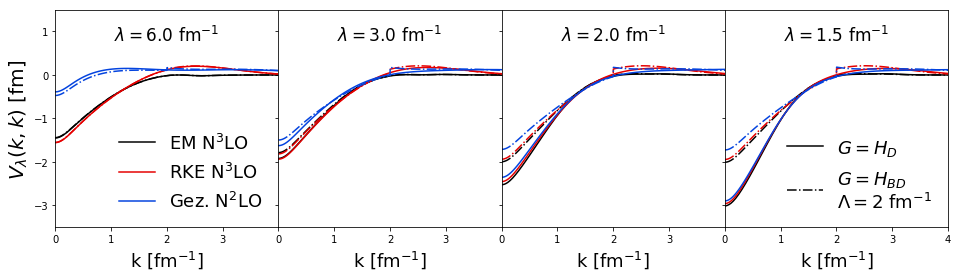

In [8]:
# Plot diagonal matrix elements of SRG-evolved potentials


potential_diagonals('3S1')

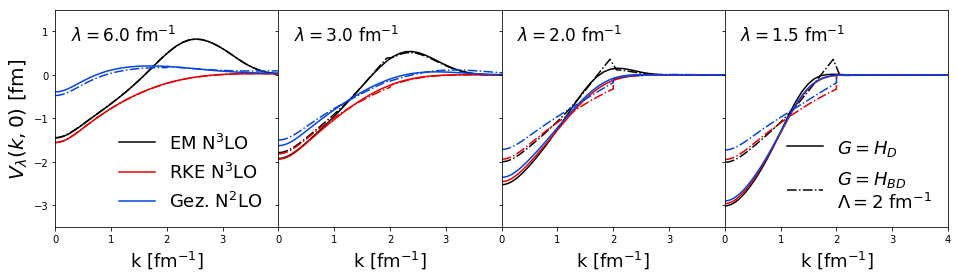

In [9]:
# Plot far off-diagonal matrix elements of SRG-evolved potentials


potential_off_diagonals('3S1')